In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('urban_pluvial_flood_risk_dataset (2).csv')
df.head()

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,NaN,Copernicus_EEA-10_v5,Institutional,NaN,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor


In [3]:
df.isnull().sum()

segment_id                               0
city_name                                0
admin_ward                               0
latitude                                 0
longitude                                0
catchment_id                             0
elevation_m                            161
dem_source                               0
land_use                                 0
soil_group                             362
drainage_density_km_per_km2            284
storm_drain_proximity_m                239
storm_drain_type                       178
rainfall_source                        315
historical_rainfall_intensity_mm_hr      0
return_period_years                      0
risk_labels                              0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   segment_id                           2963 non-null   object 
 1   city_name                            2963 non-null   object 
 2   admin_ward                           2963 non-null   object 
 3   latitude                             2963 non-null   float64
 4   longitude                            2963 non-null   float64
 5   catchment_id                         2963 non-null   object 
 6   elevation_m                          2802 non-null   float64
 7   dem_source                           2963 non-null   object 
 8   land_use                             2963 non-null   object 
 9   soil_group                           2601 non-null   object 
 10  drainage_density_km_per_km2          2679 non-null   float64
 11  storm_drain_proximity_m       

In [5]:
df['elevation_m'] = df['elevation_m'].fillna(df['elevation_m'].median()) 

In [6]:
df['soil_group'].mode()

0    B
Name: soil_group, dtype: object

In [7]:
df['soil_group'] = df['soil_group'].fillna('B')

In [8]:
df['drainage_density_km_per_km2'] = df['drainage_density_km_per_km2'].fillna(df['drainage_density_km_per_km2'].mean())

In [9]:
df['storm_drain_type'].value_counts()

storm_drain_type
CurbInlet      843
Manhole        749
GratedInlet    644
OpenChannel    549
Name: count, dtype: int64

In [10]:
choices = ["CurbInlet", "Manhole", "GratedInlet", "OpenChannel"]

# Fill NaN values randomly
df.loc[df['storm_drain_type'].isna(), 'storm_drain_type'] = np.random.choice(
    choices, 
    size=df['storm_drain_type'].isna().sum()
)


In [11]:
df.fillna({'storm_drain_proximity_m': df['storm_drain_proximity_m'].mean()}, inplace=True)

In [12]:
df['rainfall_source'].value_counts()

rainfall_source
ERA5          1334
LocalGauge     502
Blended        445
IMD            367
Name: count, dtype: int64

In [13]:
choices = ["LocalGauge", "Blended", "IMD"]

df.loc[df['rainfall_source'].isna(), 'rainfall_source'] = np.random.choice(
    choices,
    size=df['rainfall_source'].isna().sum()
)

In [14]:
df.isnull().sum()

segment_id                             0
city_name                              0
admin_ward                             0
latitude                               0
longitude                              0
catchment_id                           0
elevation_m                            0
dem_source                             0
land_use                               0
soil_group                             0
drainage_density_km_per_km2            0
storm_drain_proximity_m                0
storm_drain_type                       0
rainfall_source                        0
historical_rainfall_intensity_mm_hr    0
return_period_years                    0
risk_labels                            0
dtype: int64

In [15]:
df.describe()

,latitude,longitude,elevation_m,drainage_density_km_per_km2,storm_drain_proximity_m,historical_rainfall_intensity_mm_hr,return_period_years
count,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000
mean,19.399103,31.676123,37.007357,6.290866,123.202203,43.811441,19.730003
std,24.446320,79.542482,37.749797,2.079860,103.325420,25.221200,25.182883
min,-36.999038,-123.292949,-3.000000,1.270000,0.200000,5.400000,2.000000
25%,6.580006,-43.124581,9.540000,4.835000,51.150000,25.800000,5.000000
50%,23.760802,36.889173,25.130000,6.290866,100.500000,37.900000,10.000000
75%,37.887422,101.701136,57.010000,7.670000,155.350000,55.550000,25.000000
max,55.821219,174.911271,266.700000,12.070000,751.700000,150.000000,100.000000


In [16]:
numerical_col = [col for col in df.columns if df[col].dtype != 'O']
categorical_col = [col for col  in df.columns if df[col].dtype =='O']

In [17]:
numerical_col,categorical_col

(['latitude',
  'longitude',
  'elevation_m',
  'drainage_density_km_per_km2',
  'storm_drain_proximity_m',
  'historical_rainfall_intensity_mm_hr',
  'return_period_years'],
 ['segment_id',
  'city_name',
  'admin_ward',
  'catchment_id',
  'dem_source',
  'land_use',
  'soil_group',
  'storm_drain_type',
  'rainfall_source',
  'risk_labels'])

/var/folders/xv/dr5rw5h54hj78zb3kd5phk8w0000gn/T/ipykernel_40116/2518109614.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


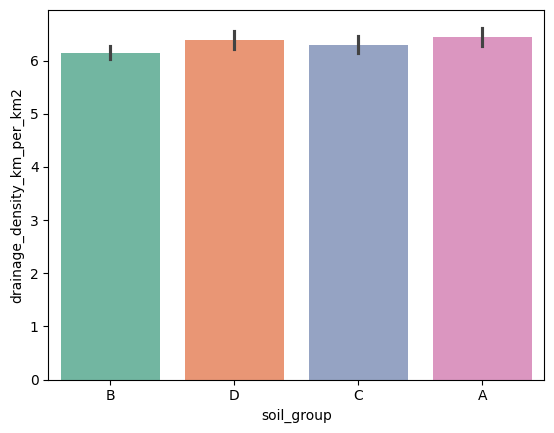

In [18]:
sns.barplot(
    data=df,
    x="soil_group",
    y="drainage_density_km_per_km2",
    palette="Set2",
    estimator="mean"  
)
plt.show()

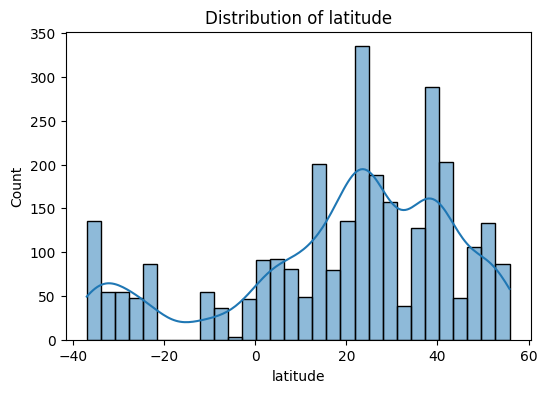

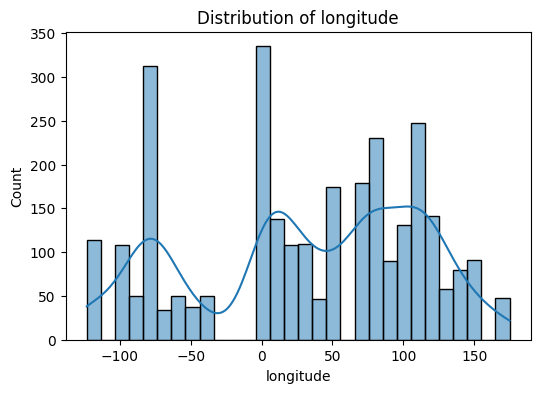

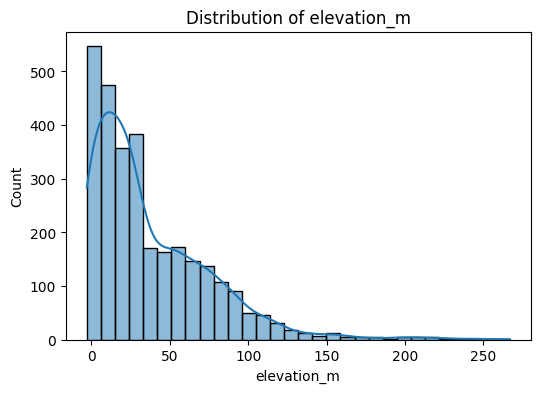

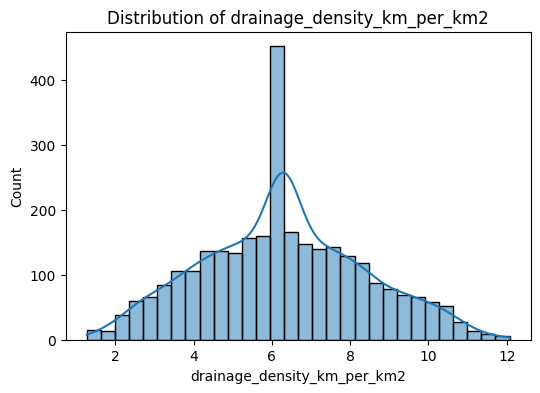

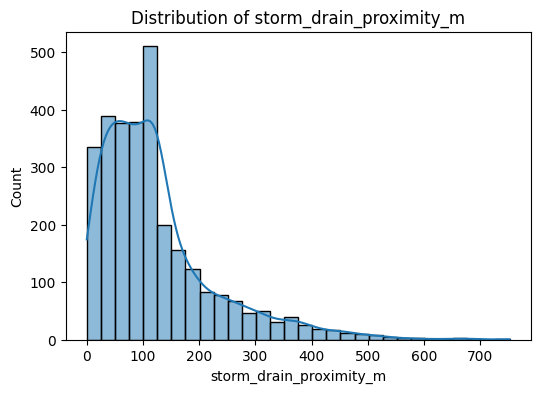

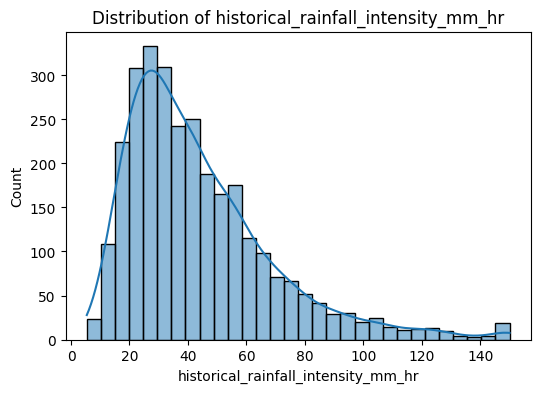

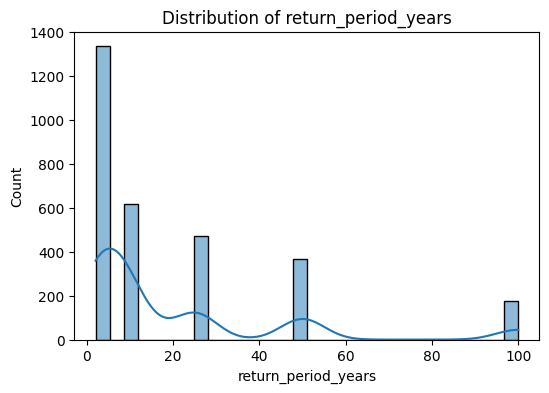

In [19]:
for col in numerical_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.show()

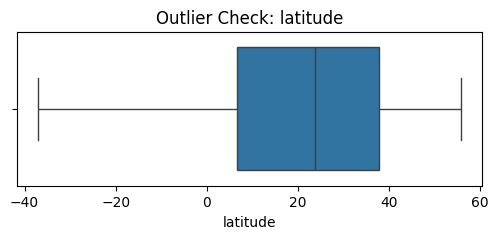

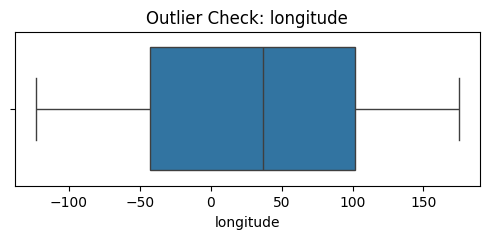

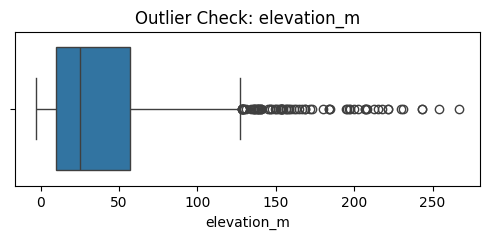

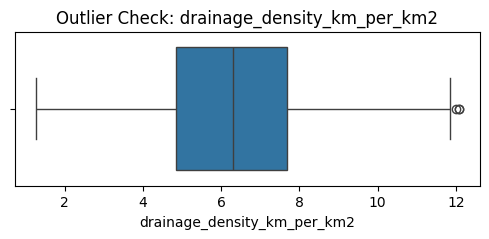

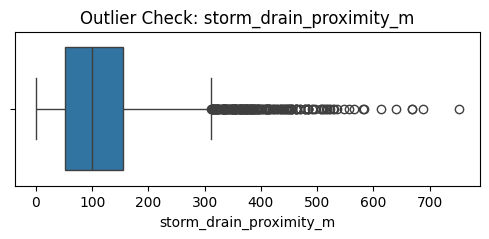

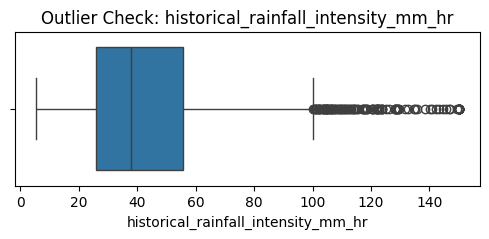

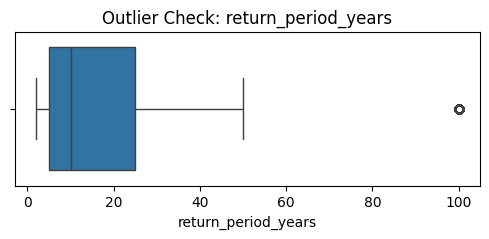

In [20]:
for col in numerical_col:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()

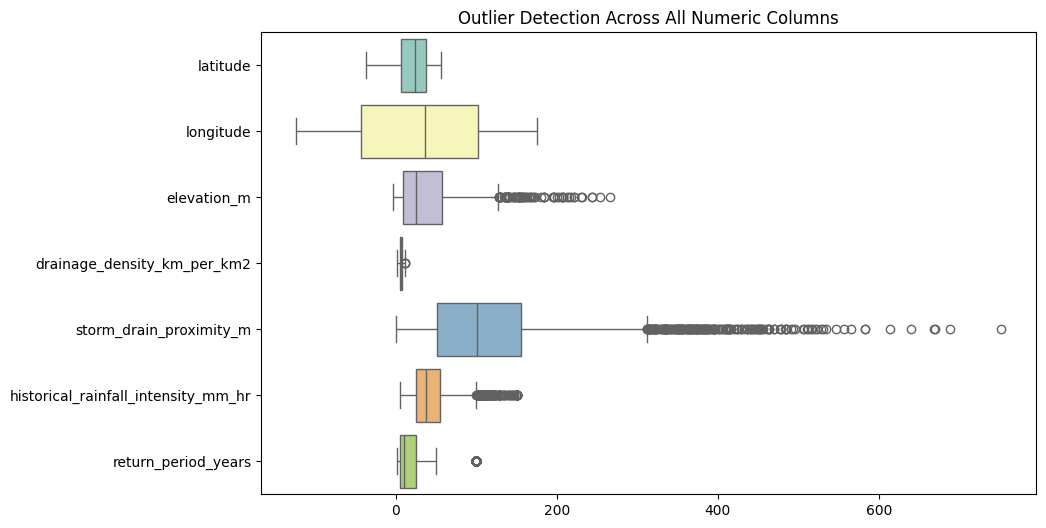

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_col], orient="h", palette="Set3")
plt.title("Outlier Detection Across All Numeric Columns")
plt.show()

In [22]:
from scipy import stats

# Keep only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Calculate Z-scores
z_scores = np.abs(stats.zscore(numeric_df))

# Set threshold (commonly 3, can tune to 2.5 for stricter filtering)
threshold = 3

# Keep rows where ALL numeric columns are within threshold
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

ModuleNotFoundError: No module named 'scipy'

In [23]:
from scipy import stats

# Keep only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Calculate Z-scores
z_scores = np.abs(stats.zscore(numeric_df))

# Set threshold (commonly 3, can tune to 2.5 for stricter filtering)
threshold = 3

# Keep rows where ALL numeric columns are within threshold
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (2963, 17)
After removing outliers: (2652, 17)


In [24]:
df = df_no_outliers

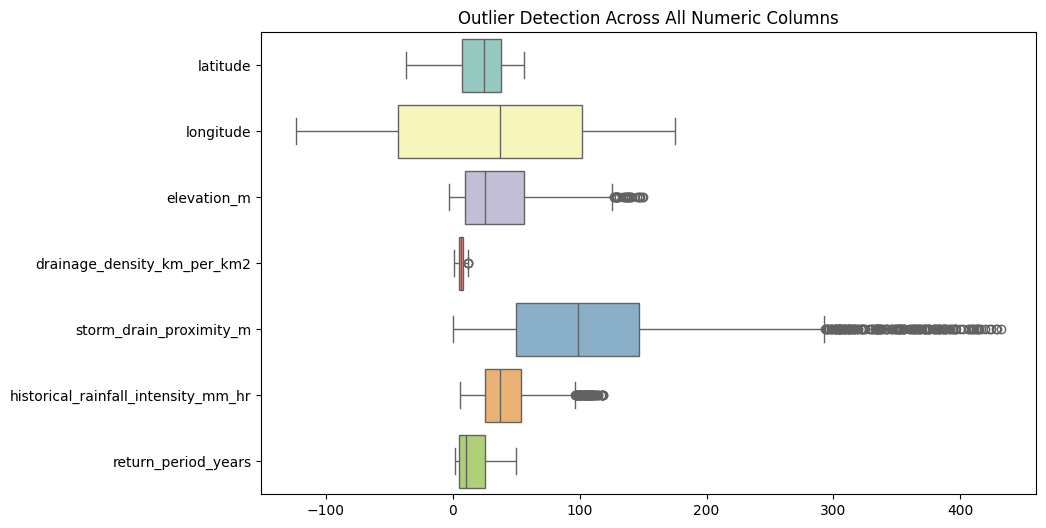

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_col], orient="h", palette="Set3")
plt.title("Outlier Detection Across All Numeric Columns")
plt.show()

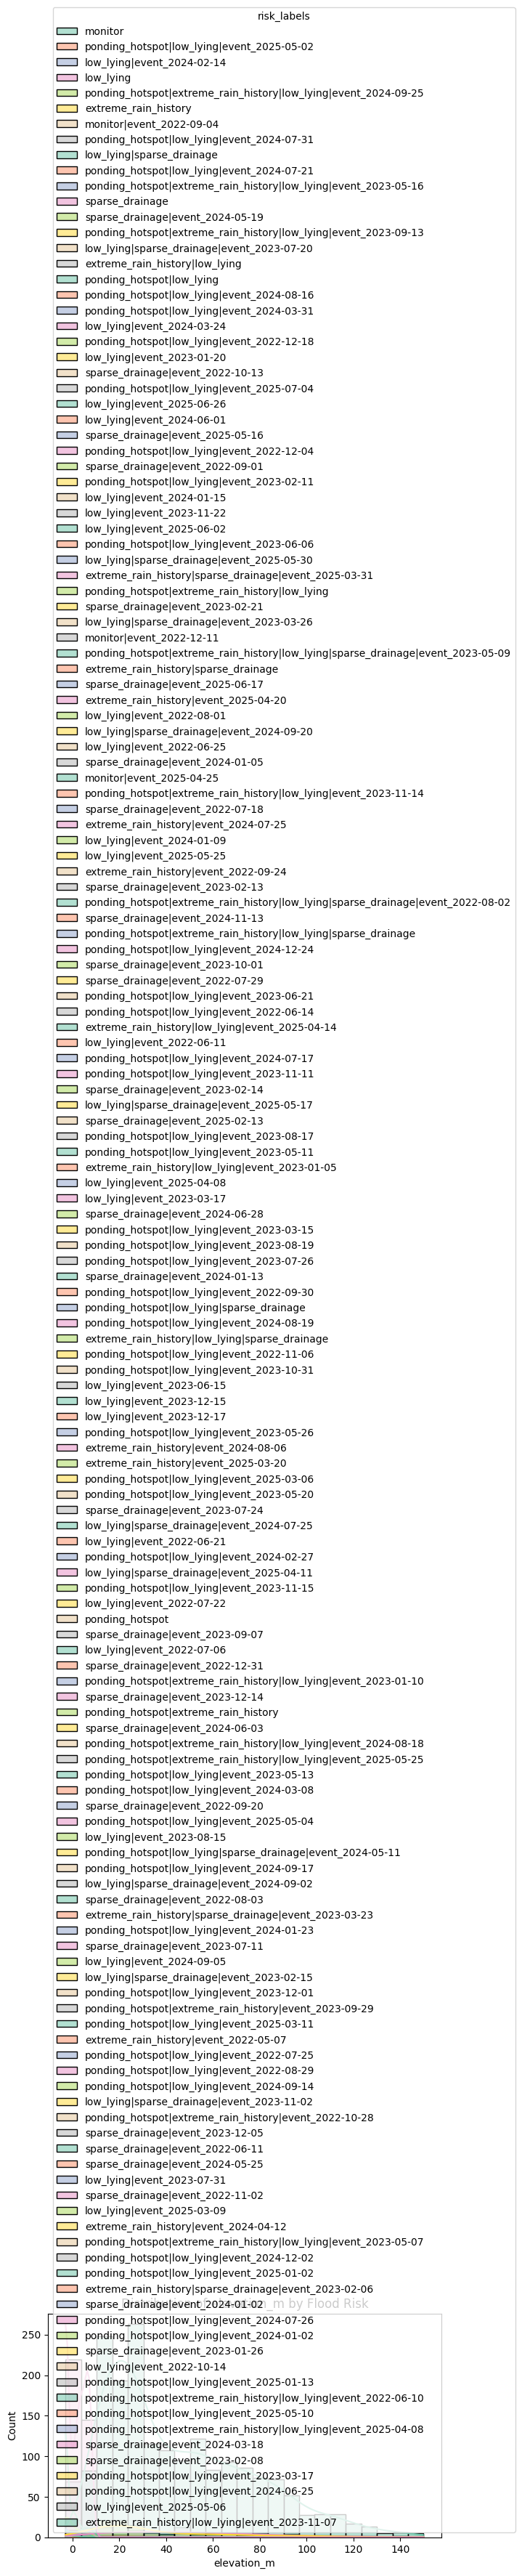

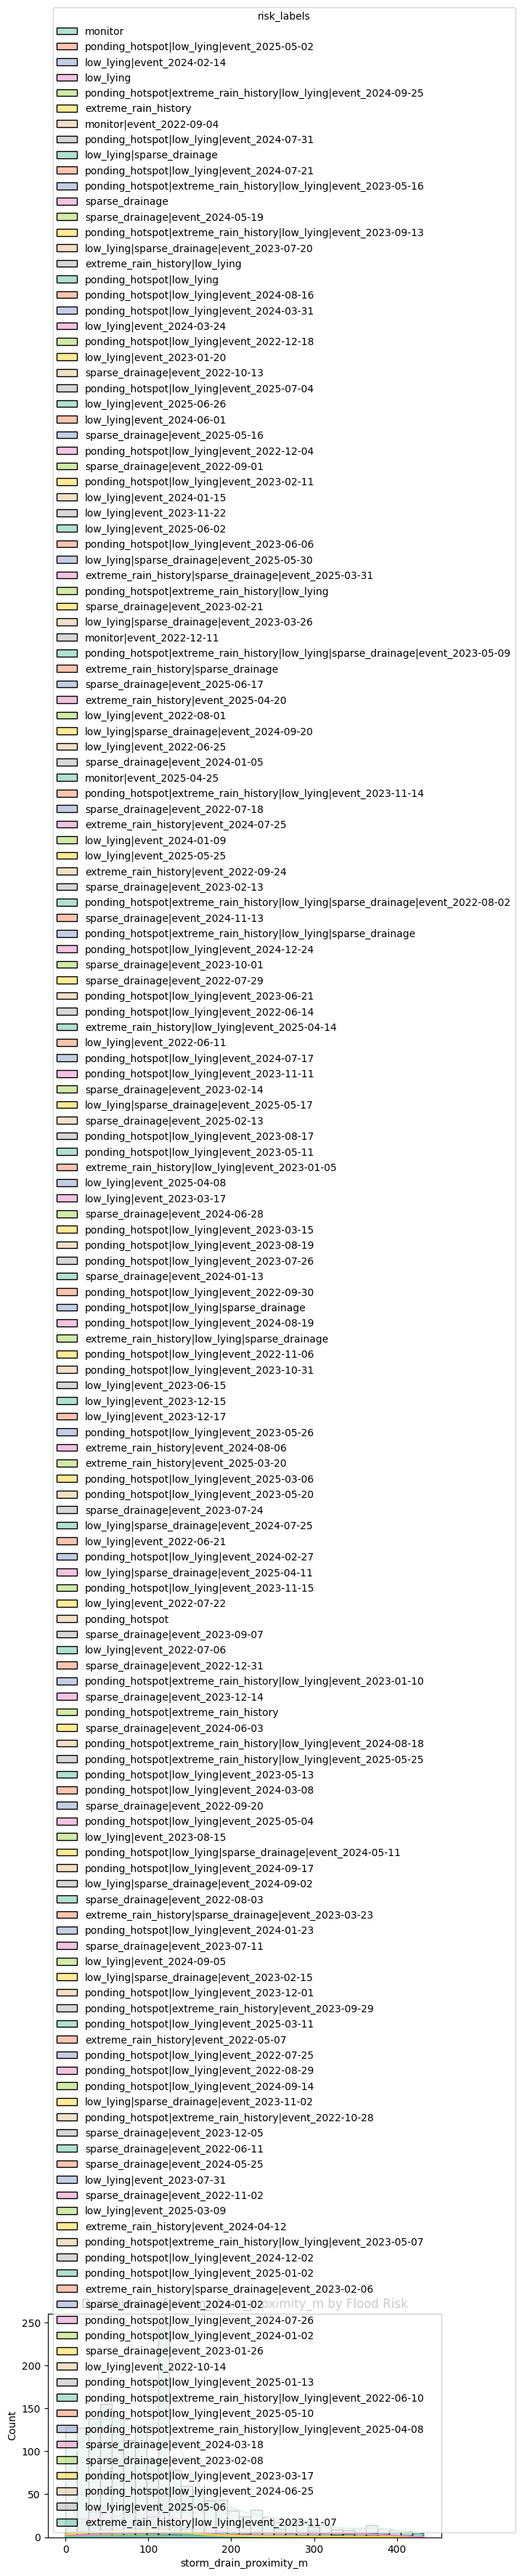

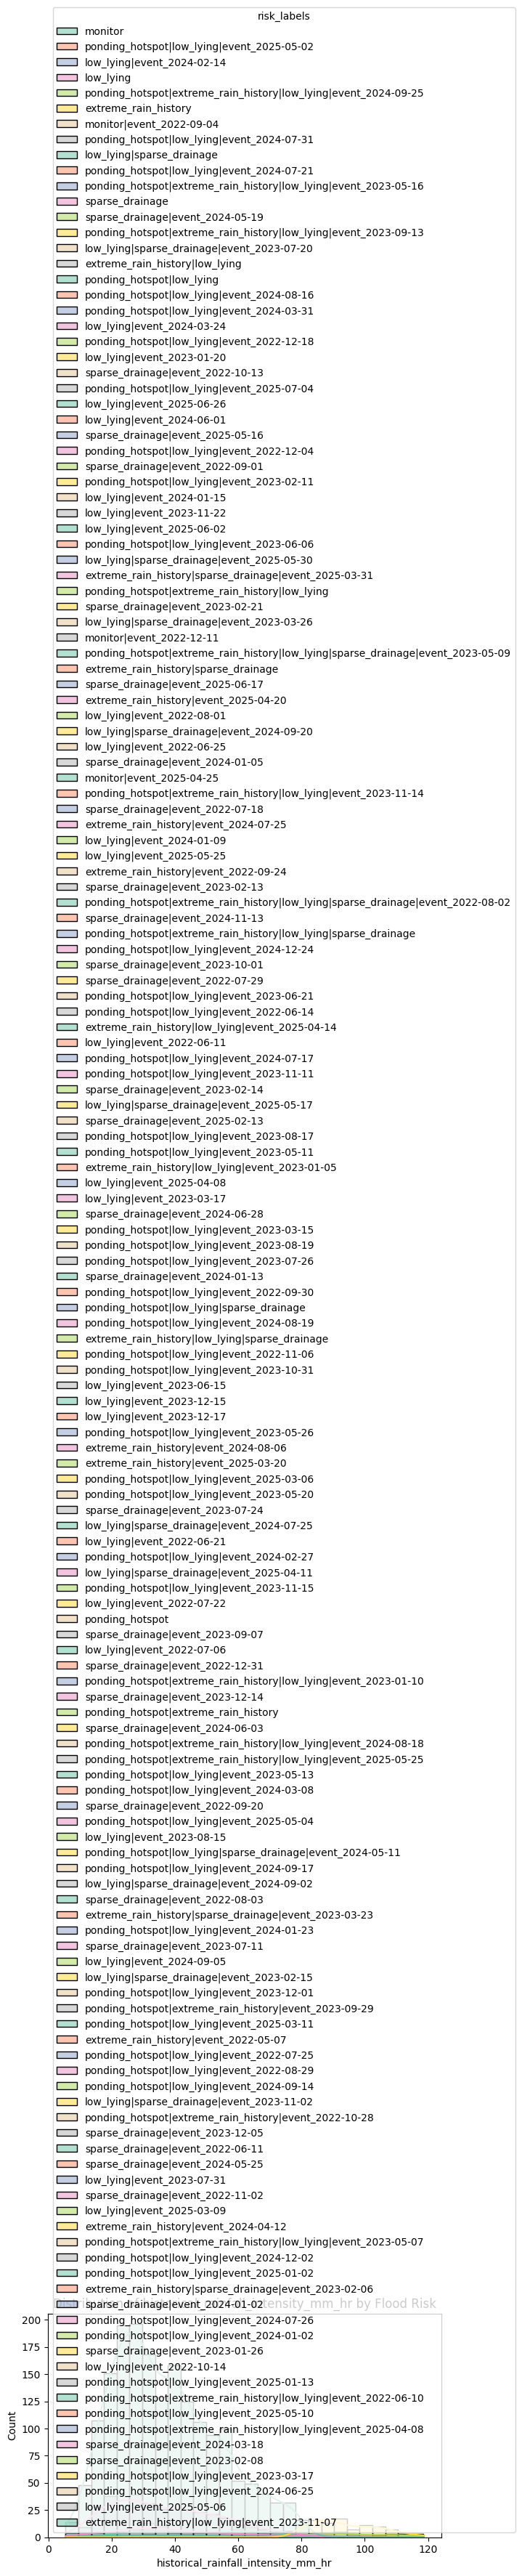

In [26]:
for col in ["elevation_m", "storm_drain_proximity_m", "historical_rainfall_intensity_mm_hr"]:
    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=col, hue="risk_labels", kde=True, palette="Set2", alpha=0.5)
    plt.title(f"Distribution of {col} by Flood Risk")
    plt.show()